# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv files and listing the datas
df_btrain = pd.read_csv(r"C:\Users\Premium\Downloads\termdeposit_train.csv")
df_btest = pd.read_csv(r"C:\Users\Premium\Downloads\termdeposit_test.csv")


In [3]:
df_btrain.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df_btest.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3310,25169,45,self-employed,married,tertiary,no,35589,no,no,telephone,18,nov,570,2,-1,0,unknown
8151,19337,33,technician,single,secondary,no,3059,no,yes,cellular,6,aug,482,2,-1,0,unknown
11383,35194,29,admin.,single,tertiary,no,422,yes,no,cellular,7,may,103,1,363,1,failure
11072,43120,43,self-employed,married,tertiary,no,10072,no,no,cellular,24,feb,145,1,100,4,failure
7064,34297,38,management,divorced,tertiary,no,6368,yes,no,cellular,4,may,922,4,-1,0,unknown


In [8]:
# To know number of columns and rows
df_btrain.shape

(31647, 18)

In [10]:
df_btest.shape

(13564, 17)

So clearly we ca see that there are 17 common variables in each dataset and "subsribed " is the only predicted value we need to find in test.


In [11]:
df_btrain.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [12]:
df_btest.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

Hence we can conclude that "subscribed" is the target variable.

# Exploring Data

In [5]:
#To know the information about each column like the data type, etc we use the info() function.
df_btrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [13]:
df_btest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [14]:
#checking for missing values in train dataset
df_btrain.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [15]:
#checking for missing values in train dataset
df_btest.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are No  NULL values present in the dataset.

# Exploratory data Analysis

# Univariate Analysis

Analysing the Job Variant:


In [18]:

df_btrain['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

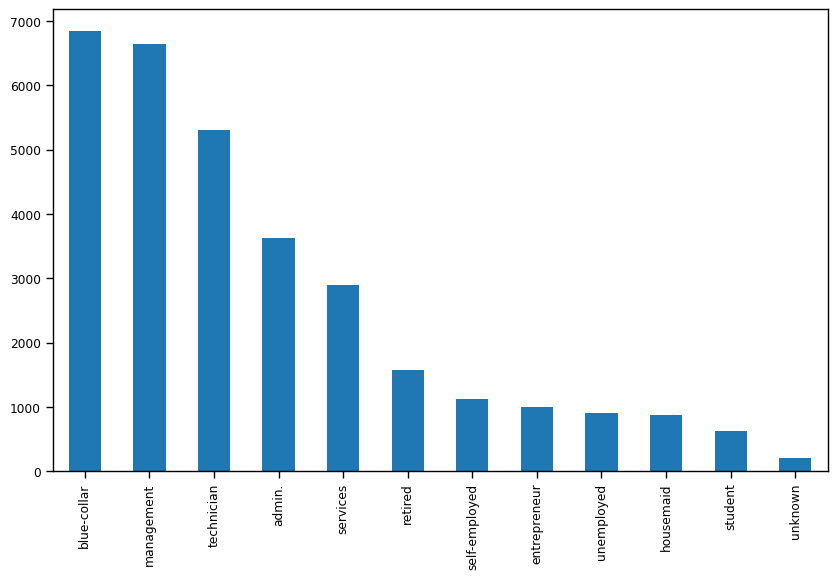

In [19]:
#Bar  Plotting 
sns.set_context('paper')
df_btrain['job'].value_counts().plot(kind='bar', figsize=(10,6));

From the above analysis we can say that the job role palys a vital role in deciding the subscription to termdeposit or not.
The no.1 Depositers are blue collar jobs and the least are the students.

Analysing the subscribers

In [20]:
df_btrain['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

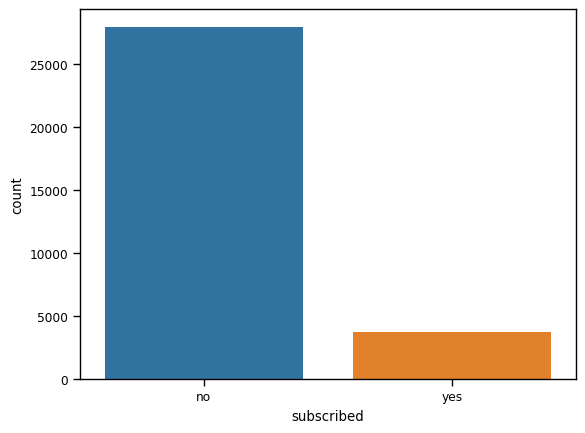

In [21]:
#Count plot for subscribers
sns.countplot(data=df_btrain, x='subscribed')

In [23]:
df_btrain['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

From the above observation we can clearly say that only 11.7% of the total has been subscribed and rest is not.

Analysis of 'marital' status

In [25]:
df_btrain['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

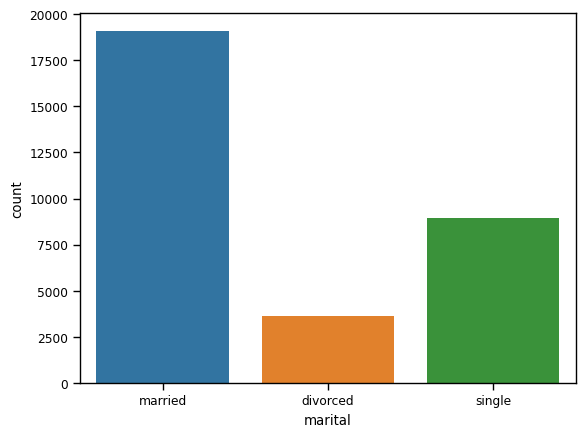

In [26]:
sns.countplot(data=df_btrain, x='marital');

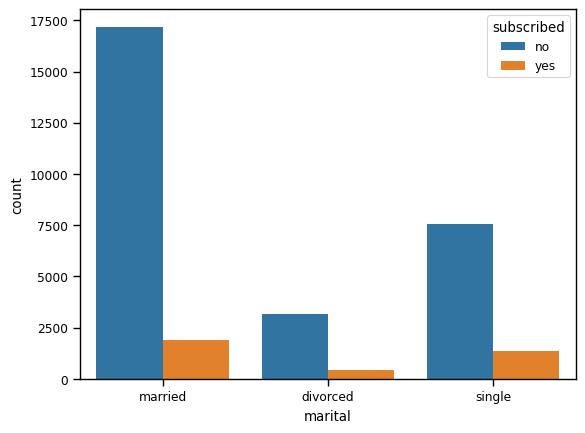

In [27]:
sns.countplot(data=df_btrain, x='marital', hue='subscribed');

From the above chart we can see the maritail status also plays an important part in subscribing to term deposits.

Analyzing the 'age' variant

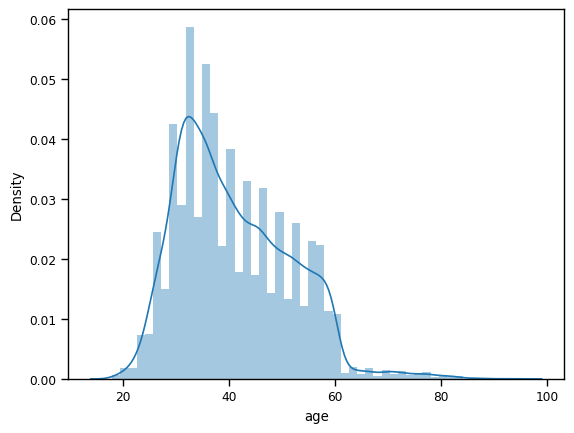

In [28]:
sns.distplot(df_btrain['age']);

We observe that most people fall under 20 to 60years of age category.

# Bivariate Analysis

In [29]:
#Analysing job vs subscribed 
print(pd.crosstab(df_btrain['job'],df_btrain['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [30]:
job = pd.crosstab(df_btrain['job'],df_btrain['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

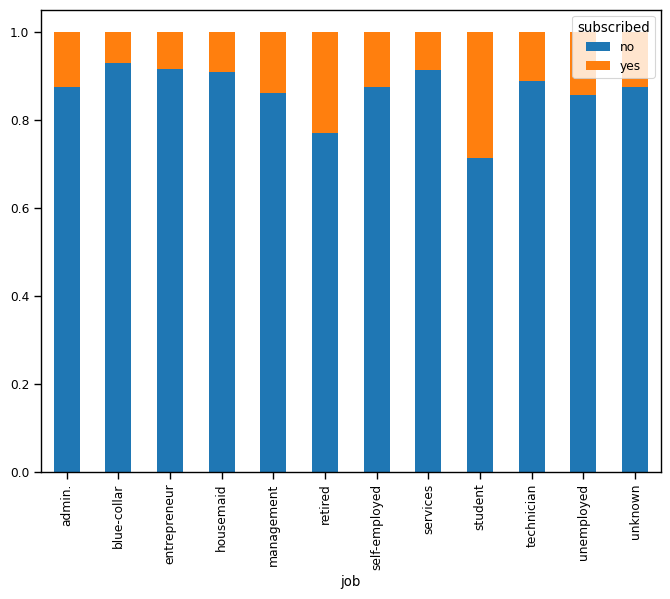

In [31]:
job_norm.plot.bar(stacked=True,figsize=(8,6));


From the above analysis we can say that the retired people and students have higher chances of subscribing.

In [36]:
#loan vs subscribed
pd.crosstab(df_btrain['loan'], df_btrain['subscribed'])

subscribed,no,yes
loan,,
no,23132,3384
yes,4800,331


In [37]:
loan = pd.crosstab(df_btrain['loan'], df_btrain['subscribed'])
loan_norm = loan.div(loan.sum(1).astype(float), axis=0)
loan_norm

subscribed,no,yes
loan,,
no,0.872379,0.127621
yes,0.935490,0.064510


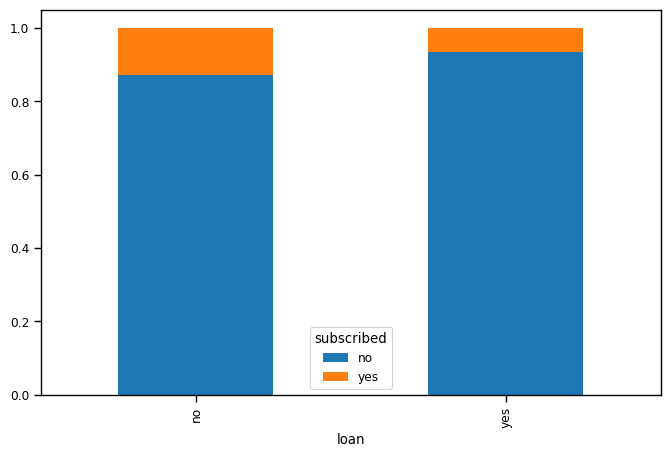

In [38]:
loan_norm.plot.bar(stacked=True, figsize=(8,5));

from this people who have not taken loan have higher possiblity to be the subscriber.

# Label Encoding

In [39]:
# Converting the target variables into 0s and 1s
df_btrain['subscribed'].replace('no', 0,inplace=True)
df_btrain['subscribed'].replace('yes', 1,inplace=True)

In [40]:
df_btrain['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

# Correlation Matrix

In [41]:
trainc = df_btrain.corr()
trainc

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<AxesSubplot:>

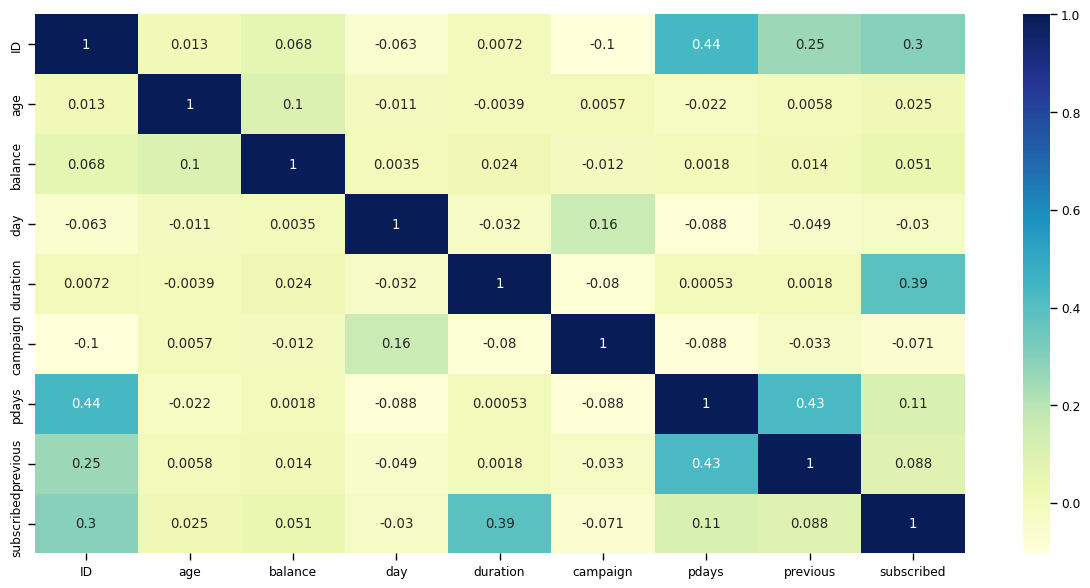

In [43]:
fig,ax= plt.subplots()
fig.set_size_inches(15,7)
sns.heatmap(trainc, annot=True, cmap='YlGnBu')

From the observation duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

# Data preprocessing

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
df_btrain.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different values.

In [48]:
target = df_btrain['subscribed']
train = df_btrain.drop('subscribed', axis=1)


In [49]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Spliting data train test

Splitting the data into train and validation set such as to validate the results of our model on the validation set. keeping 20% of the dataset as our validation set and the rest as our training set.

In [50]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

Now our data is ready and it's time to build our model and check its performance. Since it's a classification problem, I'll be using Logistic Regression model for this problem.

# Model Building

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

#creating an object of logistic regression model
lreg = LogisticRegression()

In [52]:
#fitting the data into the model
lreg.fit(X_train,y_train)

LogisticRegression()

In [54]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

Checking the accuracy of our model

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.8911532385466034

We got an accuracy score of around 89% on the validation dataset.
Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Using Decision Tree algorithm to for dealing with non-linearity

# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [60]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [61]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [62]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.9042654028436019

We got an accuracy of more than 90% on the validation set.



# Let's now make the prediction on test dataset

In [63]:
test = pd.get_dummies(df_btest)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [64]:
test_pred = clf.predict(test)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

# Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [71]:
# splitting the data

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)


In [72]:


param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(clf, param_grid=param_grid)
# fitting the model
grid_search_model.fit(X_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}


#  Save these predictions into a csv file.

In [79]:
# set the output as a dataframe
submissions = pd.DataFrame()

In [74]:
submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [75]:
submissions['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [76]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [77]:
submissions['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [80]:
#convert to csv file named submission file.csv
submissions.to_csv('submission file.csv', header=True, index=False)